In [290]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.display import display, HTML
import numpy as np
import json
from scipy import stats
import math

from datetime import datetime
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

In [291]:
root = '../data_storage'
file_names = []
dates = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))
        
        datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
        dates.append(datetime_object)
        
youngest = max(dates)

for file in files:
    datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
    if(datetime_object == youngest):
        youngest = '../data_storage/' + file

In [292]:
main_frame = pd.DataFrame()

for f in file_names:
    df = pd.read_json(f)
    df['created_at'] = datetime.strptime(f[21:-9], '%d %b %Y %H:%M:%S')
    main_frame = main_frame.append(df)
    
youngest_frame = pd.read_json(youngest)


In [293]:
main_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo,created_at
0,"Kreisklinik Wolfratshausen, Moosbauerweg 5, 82...",Website,BY,green,green,"28.03.2020, 08:48",NaN,2020-03-28 09:13:28
1,"Klinikum-Bremen-Nord, Klinik für Anästhesiolog...",Intensivstation Website,HB,green,green,"27.03.2020, 18:20",NaN,2020-03-28 09:13:28
2,"Helios Frankenwaldklinik Kronach, Anästhesie, ...",4a Website,BY,yellow,yellow,"27.03.2020, 17:00",NaN,2020-03-28 09:13:28
3,"St. Irmgardis Süchteln GmbH, Anästhesiologie, ...",Intensivstation Website,NRW,green,green,"27.03.2020, 16:10",NaN,2020-03-28 09:13:28
4,"Schön Klinik Bad Staffelstein, Neurologie, Am ...",Frührehabiltation Website,BY,yellow,red,"27.03.2020, 16:00",NaN,2020-03-28 09:13:28
...,...,...,...,...,...,...,...,...
729,"Brüderkrankenhaus Trier, 3. medizinische Klini...",Intensivstation 1E Herzzentrum Website,RP,yellow,yellow,"27.03.2020, 07:59",green,2020-03-28 20:13:28
730,"Universitätsklinikum Hamburg-Eppendorf, Klinik...",Website,HH,green,green,"26.03.2020, 12:50",green,2020-03-28 20:13:28
731,"Universitätsklinikum Erlangen, Intensivmedizin...",Koordination Website,BY,green,green,"27.03.2020, 15:15",green,2020-03-28 20:13:28
732,"Klinikum Nürnberg, Klinik für Innere Medizin 3...",Website,BY,green,green,"20.03.2013, 09:26",green,2020-03-28 20:13:28


# Anzahl der Krankenhäuser pro Bundesland

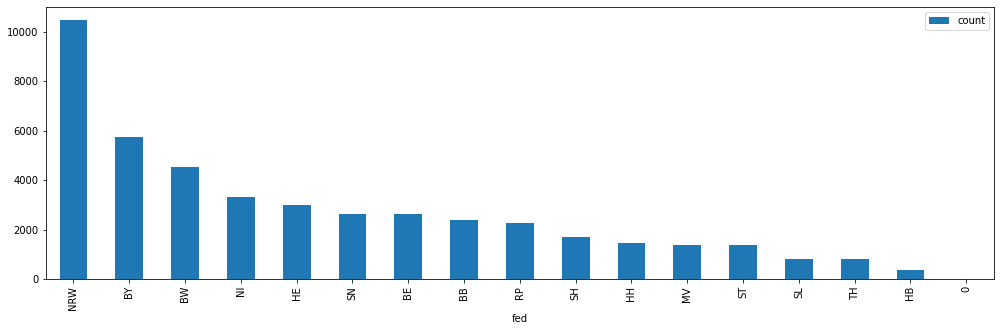

In [294]:
fed_count = pd.DataFrame({'count' : main_frame.groupby('fed').count()['hospital']}).reset_index()
fed_count = fed_count.sort_values(by=['count'], ascending=False)
fed_count = fed_count.set_index('fed')

fed_count.plot(kind='bar')

# Anzahl der Betten - Intensivbetten ohne invasive Beatmungsmöglichkeit (Monitoring, Überwachung, ggf. nicht-invasive Beatmung möglich)

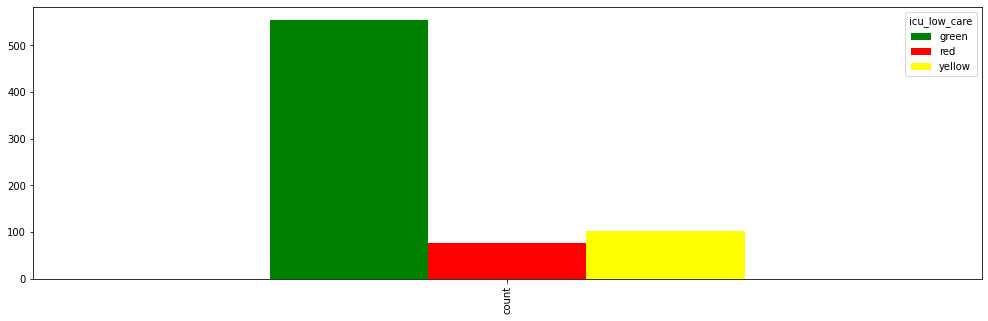

In [295]:
status_icu_low_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_low_care').count()['hospital']}).reset_index()
status_icu_low_care_count  = status_icu_low_care_count.set_index('icu_low_care')

status_icu_low_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])

# Anzahl der Betten - Intensivbetten mit invasiver Beatmungsmöglichkeit (Beatmungsbetten)

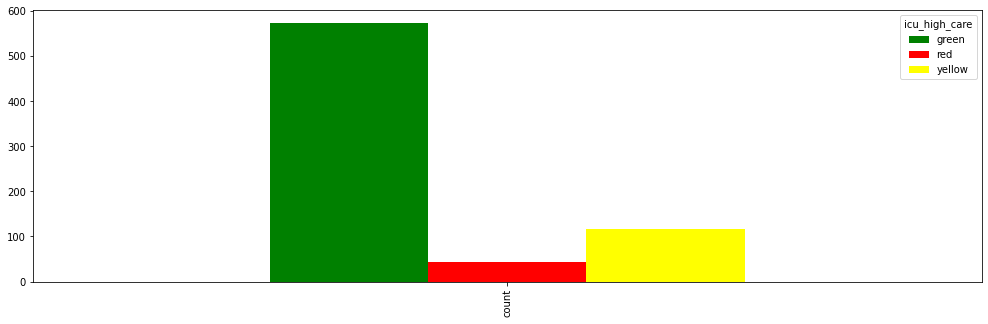

In [296]:
status_icu_high_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_high_care').count()['hospital']}).reset_index()
status_icu_high_care_count  = status_icu_high_care_count.set_index('icu_high_care')

status_icu_high_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])



# Zeitlicher Verlauf der Betten-Belegung

In [297]:
#pd.DataFrame({'count' : main_frame.groupby('updated').count()['hospital']}).reset_index()
column_values = main_frame[["icu_low_care", "updated", "hospital"]].values
index = pd.Index(column_values)

frame = index.to_frame()
frame.columns = ["All"]
frame = frame.reset_index().drop(['index'], axis=1)
frame['freq'] = frame.groupby('All')['All'].transform('count')
print(frame)

                                                     All  freq
0      (green, 28.03.2020, 08:48, Kreisklinik Wolfrat...    14
1      (green, 27.03.2020, 18:20, Klinikum-Bremen-Nor...    22
2      (yellow, 27.03.2020, 17:00, Helios Frankenwald...    30
3      (green, 27.03.2020, 16:10, St. Irmgardis Sücht...    33
4      (yellow, 27.03.2020, 16:00, Schön Klinik Bad S...    33
...                                                  ...   ...
44769  (yellow, 27.03.2020, 07:59, Brüderkrankenhaus ...    41
44770  (green, 26.03.2020, 12:50, Universitätskliniku...    57
44771  (green, 27.03.2020, 15:15, Universitätskliniku...    33
44772  (green, 20.03.2013, 09:26, Klinikum Nürnberg, ...    59
44773  (green, 26.03.2020, 16:15, Elisabeth-Krankenha...    57

[44774 rows x 2 columns]


In [298]:
index = pd.Index([2, 2, 2, 5,5,5,5,5,5, 3, 4,4,4,4])
index.value_counts()

main_frame = main_frame.drop_duplicates(subset=df.columns.difference(['created_at']), keep='first', inplace=False)

main_frame['updated'] = main_frame['updated'].map(lambda x: str(x)[:-7])
main_frame

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo,created_at
0,"Kreisklinik Wolfratshausen, Moosbauerweg 5, 82...",Website,BY,green,green,28.03.2020,NaN,2020-03-28 09:13:28
1,"Klinikum-Bremen-Nord, Klinik für Anästhesiolog...",Intensivstation Website,HB,green,green,27.03.2020,NaN,2020-03-28 09:13:28
2,"Helios Frankenwaldklinik Kronach, Anästhesie, ...",4a Website,BY,yellow,yellow,27.03.2020,NaN,2020-03-28 09:13:28
3,"St. Irmgardis Süchteln GmbH, Anästhesiologie, ...",Intensivstation Website,NRW,green,green,27.03.2020,NaN,2020-03-28 09:13:28
4,"Schön Klinik Bad Staffelstein, Neurologie, Am ...",Frührehabiltation Website,BY,yellow,red,27.03.2020,NaN,2020-03-28 09:13:28
...,...,...,...,...,...,...,...,...
542,"EvangelischeElisabeth Klinik Berlin, Anästhesi...",Intensivstation 7 Website,BE,yellow,yellow,26.03.2020,NaN,2020-03-26 16:13:56
557,"Universitätsklinikum Marien Hospital Herne, In...",interdisziplinäre Intensivstation Website,NRW,green,green,26.03.2020,green,2020-03-26 16:13:56
131,"Klinik Kitzinger Land, Anästhesie, Intensiv- u...",Interdisziplinäre Intensivstation Website,BY,green,green,27.03.2020,NaN,2020-03-27 07:13:31
237,"Diakonie-Klinikum Stuttgart, Rosenbergstraße 3...",Covid ITS/ IMC Website,BW,yellow,red,27.03.2020,NaN,2020-03-27 07:13:31


# Zeitlicher Verlauf - icu_low_care

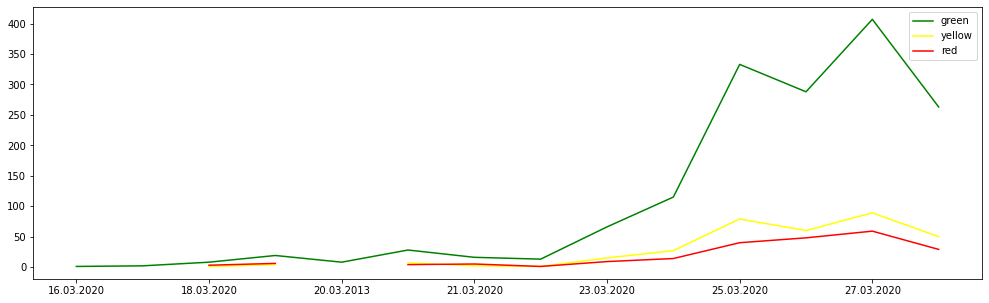

In [306]:
status_low_green = main_frame.loc[main_frame['icu_low_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_low_green = status_low_green.rename(columns={"hospital": "green"})
status_low_yellow = main_frame.loc[main_frame['icu_low_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_low_yellow = status_low_yellow.rename(columns={"hospital": "yellow"})
status_low_red = main_frame.loc[main_frame['icu_low_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_low_red = status_low_red.rename(columns={"hospital": "red"})

result = pd.concat([status_low_green, status_low_yellow, status_low_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])


# Zeitlicher Verlauf - icu_high_care

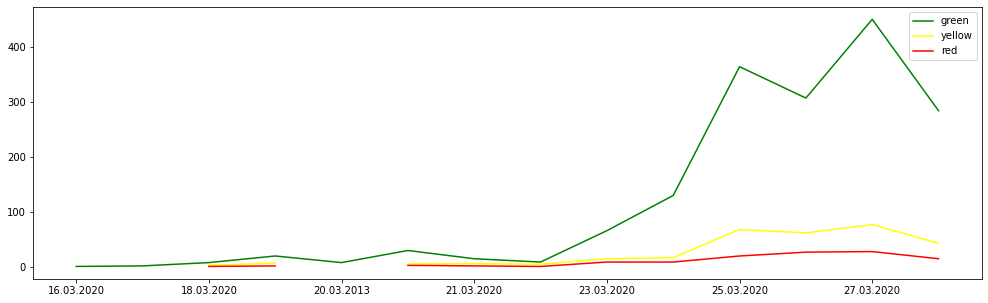

In [305]:
status_high_green = main_frame.loc[main_frame['icu_high_care'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_high_green = status_high_green.rename(columns={"hospital": "green"})
status_high_yellow = main_frame.loc[main_frame['icu_high_care'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_high_yellow = status_high_yellow.rename(columns={"hospital": "yellow"})
status_high_red = main_frame.loc[main_frame['icu_high_care'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_high_red = status_high_red.rename(columns={"hospital": "red"})

result = pd.concat([status_high_green, status_high_yellow, status_high_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])

# Zeitlicher Verlauf - ecmo

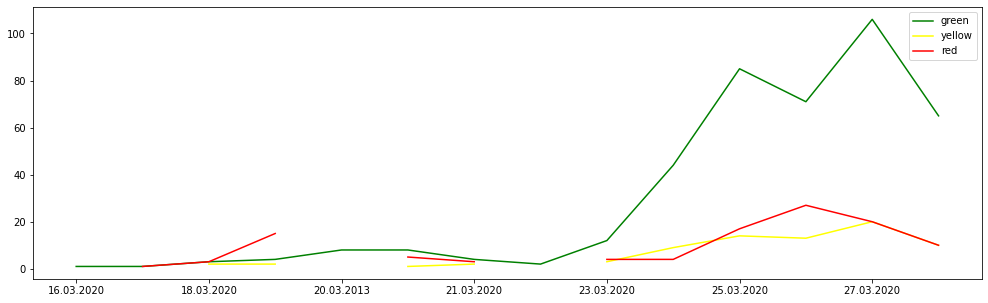

In [310]:
status_ecmo_green = main_frame.loc[main_frame['ecmo'] == "green"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_green = status_ecmo_green.rename(columns={"hospital": "green"})
status_ecmo_yellow = main_frame.loc[main_frame['ecmo'] == "yellow"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_yellow = status_ecmo_yellow.rename(columns={"hospital": "yellow"})
status_ecmo_red = main_frame.loc[main_frame['ecmo'] == "red"].groupby('updated').count()['hospital'].to_frame()
status_ecmo_red = status_ecmo_red.rename(columns={"hospital": "red"})

result = pd.concat([status_ecmo_green, status_ecmo_yellow, status_ecmo_red], axis=1)
result.plot(kind="line",  color=['green', 'yellow', 'red'])